In [12]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import optuna
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import optuna



# Cell 2: Carregamento dos dados
data = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/2_data_XGBoost.csv') 

# Separação das features e do target
X = data.drop('Transition', axis=1)
y = data['Transition']




In [7]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 400, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 0.2, log=True)
    subsample = trial.suggest_float('subsample', 0.8, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 0.7)
    gamma = trial.suggest_float('gamma', 1e-8, 0.01, log=True)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 0.001, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 0.1, 1.0)
    min_child_weight = trial.suggest_int('min_child_weight', 4, 10)

    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        min_child_weight=min_child_weight,
        eval_metric="logloss"    # Replace default eval metric if needed
    )

    
    # Avaliação usando validação cruzada
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    mean_score = scores.mean()
    
    return mean_score




In [8]:
# Criação do estudo
#study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
#study.optimize(objective, n_trials=50)

# Resultados
#print(f"Melhor F1_Score: {study.best_value}")
#print(f"Melhores hiperparâmetros: {study.best_params}")

[I 2025-01-19 17:45:45,840] A new study created in memory with name: no-name-15cd8e99-cf07-4576-94cc-8557a19f5af2
[I 2025-01-19 17:46:04,800] Trial 0 finished with value: 0.32014598216428886 and parameters: {'n_estimators': 582, 'max_depth': 5, 'learning_rate': 0.15310604457943558, 'subsample': 0.9257830783599516, 'colsample_bytree': 0.6725017873964974, 'gamma': 0.00022993992443942458, 'reg_alpha': 5.967529635350089e-06, 'reg_lambda': 0.4027471075308755, 'min_child_weight': 10}. Best is trial 0 with value: 0.32014598216428886.
[I 2025-01-19 17:46:31,938] Trial 1 finished with value: 0.3107016899022101 and parameters: {'n_estimators': 861, 'max_depth': 4, 'learning_rate': 0.10812143241008353, 'subsample': 0.8990400500060322, 'colsample_bytree': 0.6882870714405828, 'gamma': 5.117482147594924e-07, 'reg_alpha': 6.220452681839811e-05, 'reg_lambda': 0.25855634531910765, 'min_child_weight': 4}. Best is trial 0 with value: 0.32014598216428886.
[I 2025-01-19 17:46:46,913] Trial 2 finished with 

Melhor F1_Score: 0.36296430450078626
Melhores hiperparâmetros: {'n_estimators': 846, 'max_depth': 5, 'learning_rate': 0.1660773939789664, 'subsample': 0.9293091645826319, 'colsample_bytree': 0.5898888173202074, 'gamma': 0.0035106908632086685, 'reg_alpha': 3.3065806009993237e-06, 'reg_lambda': 0.6447155795041164, 'min_child_weight': 7}


### Tentativa 1 : 

Melhor F1_Score: 0.3623890534771276

Melhores hiperparâmetros: {'n_estimators': 454, 'max_depth': 6, 'learning_rate': 0.13579488903001544, 'subsample': 0.9199731861679175, 'colsample_bytree': 0.6015457475547343, 'gamma': 0.001990355165481711, 'reg_alpha': 0.00024118752720477785, 'reg_lambda': 0.5295780685602636, 'min_child_weight': 6}

### Tentativa 2: 

Melhor F1_Score: 0.36296430450078626

Melhores hiperparâmetros: {'n_estimators': 846, 'max_depth': 5, 'learning_rate': 0.1660773939789664, 'subsample': 0.9293091645826319, 'colsample_bytree': 0.5898888173202074, 'gamma': 0.0035106908632086685, 'reg_alpha': 3.3065806009993237e-06, 'reg_lambda': 0.6447155795041164, 'min_child_weight': 7}


In [14]:
def plot_confusion_matrix_with_labels(confusion_matrix, label_mapping):
    # Criar um mapeamento inverso
    reverse_label_mapping = {v: k for k, v in label_mapping.items()}
    
    # Aplicar o mapeamento inverso na matriz de confusão
    cm_with_labels = np.zeros_like(confusion_matrix, dtype=object)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            cm_with_labels[i, j] = f"{reverse_label_mapping[i]} (Pred: {reverse_label_mapping[j]})"

    # Criar um DataFrame para facilitar a visualização
    df_cm = pd.DataFrame(confusion_matrix, index=reverse_label_mapping.values(), columns=reverse_label_mapping.values())
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix with Labels')
    plt.show()
label_mapping = {
    'CN-CN': 0,
    'AD-AD': 1,
    'MCI-AD': 2,
    'MCI-MCI': 3,
    'CN-MCI' : 4
}

X_trail = data.drop(['Transition'], axis= 1)
y_trail = data['Transition']



In [9]:
xgboost_model = XGBClassifier(n_estimators= 846, max_depth=  5, learning_rate= 0.1660773939789664, subsample= 0.9293091645826319, colsample_bytree =  0.5898888173202074, gamma =0.0035106908632086685, reg_alpha =  3.3065806009993237e-06, reg_lambda = 0.6447155795041164, min_child_weight= 7)

xgboost_score = cross_val_score(xgboost_model, X, y, cv=5,scoring='f1_macro')

print(f"Cross Validation Score: {xgboost_score}")
print(f"Cross Validation Score Média: {xgboost_score.mean()}")
print(f"Cross Validation Score STD: {xgboost_score.std()}")

Cross Validation Score: [0.34841315 0.39514309 0.4412588  0.32624358 0.3037629 ]
Cross Validation Score Média: 0.36296430450078626
Cross Validation Score STD: 0.049457974494161415


In [10]:
def remove_highly_correlated_features(data, target, threshold):
    """
    Remove features altamente correlacionadas, mantendo a que tem maior correlação com o target.

    Args:
        data (pd.DataFrame): DataFrame contendo as features.
        target (pd.Series): Coluna com os valores do target.
        threshold (float): Valor de correlação acima do qual consideramos features altamente correlacionadas.

    Returns:
        pd.DataFrame: DataFrame com as colunas altamente correlacionadas removidas.
        set: Conjunto das colunas removidas.
    """
    # Compute the correlation matrix
    corr_matrix = data.corr().abs()
    
    # Compute correlation of each feature with the target
    target_corr = data.corrwith(data['Transition']).abs()
    
    # Identify columns to remove based on correlation
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                
                # Remove the column with lower correlation with the target
                if target_corr[col_i] < target_corr[col_j]:
                    to_drop.add(col_i)
                else:
                    to_drop.add(col_j)

    # Drop the identified columns
    data_final = data.drop(columns=to_drop)

    return data_final, to_drop


def remove_low_variance_features(data, threshold):
    """
    Remove columns with a standard deviation below the given threshold.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        threshold (float): The minimum standard deviation a column must have to be retained.

    Returns:
        tuple: A tuple containing:
            - pd.DataFrame: A DataFrame with low-variance columns removed.
            - list: A list of columns that were removed.
    """
    # Calculate the standard deviation for each column
    std_dev = data.std()

    # Identify columns to keep (standard deviation above threshold)
    retained_columns = std_dev[std_dev > threshold].index

    # Identify columns to remove
    removed_columns = std_dev[std_dev <= threshold].index

    # Create a new DataFrame with only the retained columns
    data_reduced = data[retained_columns]

    return data_reduced, removed_columns

from sklearn.base import ClassifierMixin

def generate_predictions_csv(model: ClassifierMixin, test_data: pd.DataFrame):
    """
    Gera um arquivo CSV com as previsões do modelo fornecido e o conjunto de teste.

    Parameters:
    - model: Classificador treinado (ex: RandomForestClassifier, DecisionTreeClassifier).
    - test_data: DataFrame de teste para o qual as previsões serão feitas.
    - output_filename: Nome do arquivo de saída para salvar as previsões (padrão é 'predictions.csv').
    """
    # Realizar as previsões
    predictions = model.predict(test_data)
    
    # Mapeamento inverso para converter de números para labels
    label_mapping = {
        0: 'CN-CN',
        1: 'AD-AD',
        2: 'MCI-AD',
        3: 'MCI-MCI',
        4:  'CN-MCI'

    }
    
    # Converter as previsões numéricas para as labels correspondentes
    predictions_labels = [label_mapping[pred] for pred in predictions]
    
    # Criar DataFrame com as previsões
    predictions_df = pd.DataFrame(predictions_labels, columns=['Result'])
    predictions_df.index = range(1, len(predictions_df) + 1)
    predictions_df.index.name = 'RowId'
    
    # Exibir a contagem de cada label prevista
    counts = predictions_df['Result'].value_counts()
    print("Contagem de previsões para cada label:")
    print(counts)
    
    # Extrair o nome do modelo para o arquivo de saída
    model_name = str(model)  
    if '(' in model_name:
        output_filename = model_name.split('(')[0] + ".csv"
    else:
        output_filename = model_name + ".csv"
    
    # Salvar o DataFrame em um arquivo CSV
    predictions_df.to_csv(output_filename, index=True)
    print(f"Resultados salvos no arquivo {output_filename}")




In [15]:
data_test = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/1_DF_Test_1_After_Pre_Processamento.csv') 
data_original= pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/1_DF_CN-MCI_1_After_Pre_Processamento.csv') 

X_cleaned, to_drop = remove_highly_correlated_features(data_original, 'Transition', 0.82)

data_final = data_test.drop(columns=to_drop,axis=1)



print("Shape Do data_set Final de treino do Random Forest ")
print(data.shape)
print("\n")
print("Shape Do data_set Final de test do Random Forest ")
print(data_final.shape)

X_train, X_test, y_train, y_test = train_test_split(X_trail, y_trail, test_size=0.25, random_state=34, stratify=y)

xgboost_model.fit(X_train,y_train)
generate_predictions_csv(xgboost_model,data_final)


Shape Do data_set Final de treino do Random Forest 
(305, 412)


Shape Do data_set Final de test do Random Forest 
(100, 411)
Contagem de previsões para cada label:
Result
CN-CN      40
AD-AD      26
MCI-MCI    19
MCI-AD     15
Name: count, dtype: int64
Resultados salvos no arquivo XGBClassifier.csv


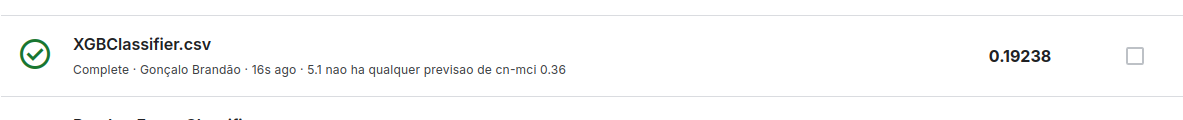

Este foi o score obtido no score publico do Kaagle, este teve cerca de 0.26 menos do que o esperado. 
A não existencia de qualquer previsão de CN-MCI ja era expectavel que tivesse um valor menor do que o cross_validation score obtido localmente, sendo esta uma das razões para a descrepancia. 